In [1]:
# configure logging
from logging import Formatter
from logging import getLogger
from logging import INFO
from logging import StreamHandler

logger = getLogger(__name__)
logger.handlers.clear()
handler = StreamHandler()
handler.setLevel(INFO)
handler.setFormatter(Formatter('%(name)s - %(asctime)s - %(levelname)s - %(message)s'))
logger.addHandler(handler)

In [2]:
# we want the 2015 data
from os import walk
from os.path import join
top = '../input/' #'/kaggle/input'
for dirname, _, filenames in walk(top=top,):
    for filename in sorted(filenames):
        if '2015' in filename:
            logger.info(join(dirname, filename))

__main__ - 2023-06-14 15:15:12,855 - INFO - ../input/mortality/2015_codes.json
__main__ - 2023-06-14 15:15:12,857 - INFO - ../input/mortality/2015_data.csv


In [3]:
# load the data and report the shape and columns
from pandas import read_csv
from pandas import DataFrame

filename = '../input/mortality/2015_data.csv'
logger.info(msg='reading {}'.format(filename))
df = read_csv(filepath_or_buffer=filename, low_memory=False, )
logger.info(msg=df.shape)
logger.info(msg=df.columns.tolist())

__main__ - 2023-06-14 15:15:12,879 - INFO - reading ../input/mortality/2015_data.csv
__main__ - 2023-06-14 15:15:48,692 - INFO - (2718198, 77)
__main__ - 2023-06-14 15:15:48,694 - INFO - ['resident_status', 'education_1989_revision', 'education_2003_revision', 'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type', 'detail_age', 'age_substitution_flag', 'age_recode_52', 'age_recode_27', 'age_recode_12', 'infant_age_recode_22', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'current_data_year', 'injury_at_work', 'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code', 'place_of_injury_for_causes_w00_y34_except_y06_and_y07_', 'icd_code_10th_revision', '358_cause_recode', '113_cause_recode', '130_infant_cause_recode', '39_cause_recode', 'number_of_entity_axis_conditions', 'entity_condition_1', 'entity_condition_2', 'entity_condition_3', 'entity_condition_4', 'entity_condition_5', 'entity_condition_6', 'entity_condition_7', '

In [4]:
# report the types
logger.info(msg=df.dtypes)
logger.info(msg=type(df.dtypes))

__main__ - 2023-06-14 15:15:48,722 - INFO - resident_status                 int64
education_1989_revision       float64
education_2003_revision       float64
education_reporting_flag        int64
month_of_death                  int64
                               ...   
race_imputation_flag          float64
race_recode_3                   int64
race_recode_5                   int64
hispanic_origin                 int64
hispanic_originrace_recode      int64
Length: 77, dtype: object
__main__ - 2023-06-14 15:15:48,725 - INFO - <class 'pandas.core.series.Series'>


In [5]:
# get ready to plot
%matplotlib inline
from matplotlib.pyplot import style
from matplotlib.pyplot import plot

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plot_style = 'seaborn-v0_8-white'
style.use(plot_style)

In [6]:
from json import load
with open(file='../input/mortality/2015_codes.json', mode='r', ) as json_fp:
    codes = load(fp=json_fp, )

<Axes: xlabel='month'>

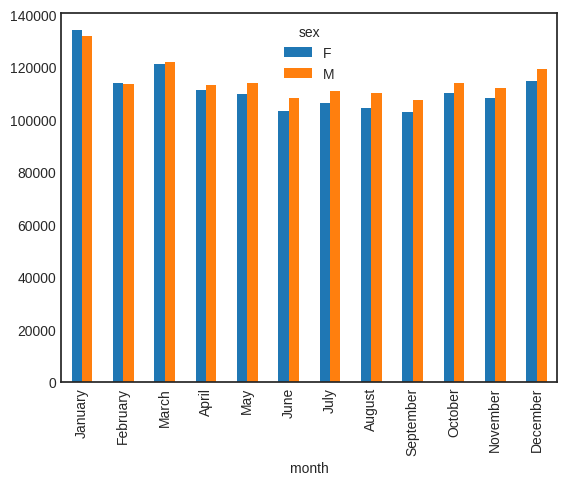

In [7]:
# plot the month of death and sex
columns_month = ['month', 'sex']
plot_df = df.rename(columns={'month_of_death': 'month'})[columns_month]
to_replace = {int(key): value for key, value in codes['month_of_death'].items()}
plot_df['month'] = plot_df['month'].replace(to_replace=to_replace)
plot_df = plot_df.groupby(by=columns_month).size().unstack().reindex(list(to_replace.values()))
plot_df.plot(kind='bar')

<Axes: xlabel='day of week'>

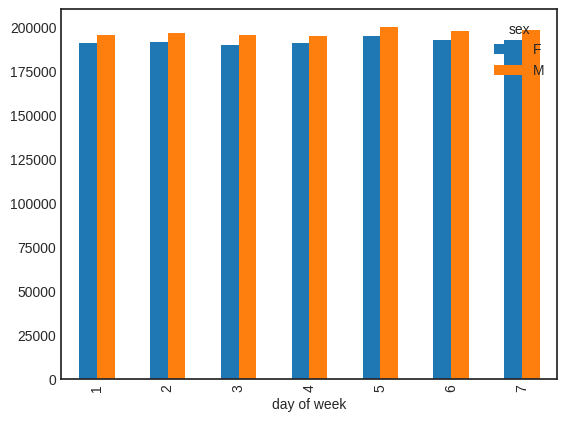

In [8]:
# plot the day of week of death and sex
columns_weekday = ['day of week', 'sex']
renamer_weekday = {'day_of_week_of_death': 'day of week'}
df[df['day_of_week_of_death'].isin(range(1, 8))].rename(columns=renamer_weekday).groupby(by=columns_weekday).size().unstack().plot(kind='bar')

<Axes: xlabel='race'>

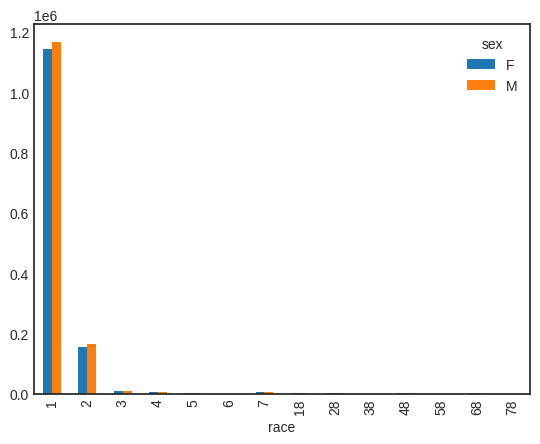

In [9]:
columns_race = ['race', 'sex']
df.groupby(by=columns_race).size().unstack().plot(kind='bar',)

In [10]:
for key in list(codes.keys()):
    logger.info(msg=key)

__main__ - 2023-06-14 15:15:58,902 - INFO - resident_status
__main__ - 2023-06-14 15:15:58,903 - INFO - education_1989_revision
__main__ - 2023-06-14 15:15:58,904 - INFO - education_2003_revision
__main__ - 2023-06-14 15:15:58,905 - INFO - education_reporting_flag
__main__ - 2023-06-14 15:15:58,906 - INFO - month_of_death
__main__ - 2023-06-14 15:15:58,907 - INFO - sex
__main__ - 2023-06-14 15:15:58,908 - INFO - age_substitution_flag
__main__ - 2023-06-14 15:15:58,909 - INFO - age_recode_52
__main__ - 2023-06-14 15:15:58,910 - INFO - age_recode_27
__main__ - 2023-06-14 15:15:58,911 - INFO - age_recode_12
__main__ - 2023-06-14 15:15:58,912 - INFO - infant_age_recode_22
__main__ - 2023-06-14 15:15:58,914 - INFO - place_of_death_and_decedents_status
__main__ - 2023-06-14 15:15:58,915 - INFO - marital_status
__main__ - 2023-06-14 15:15:58,916 - INFO - day_of_week_of_death
__main__ - 2023-06-14 15:15:58,917 - INFO - current_data_year
__main__ - 2023-06-14 15:15:58,918 - INFO - injury_at_wor

In [11]:
logger.info(msg=codes['month_of_death'])

__main__ - 2023-06-14 15:15:58,978 - INFO - {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}


In [12]:
# we are done
logger.info(msg='done')

__main__ - 2023-06-14 15:15:59,019 - INFO - done
